# Основы математической статистики с R

https://learn.datacamp.com/courses/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B-%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8-%D1%81-r

In [2]:
library(ggplot2)

## Теория вероятностей и R

<br> 1.

In [3]:
#Закон распределения
x <- c(0, 1, 2, 3)
p <- c(0.125, 0.375, 0.375, 0.125)

#Второй начальный и первый центральный моменты
second_raw <- sum(x^2 * p)
mu <- sum(x * p)
first_central <- sum((x - mu) * p)

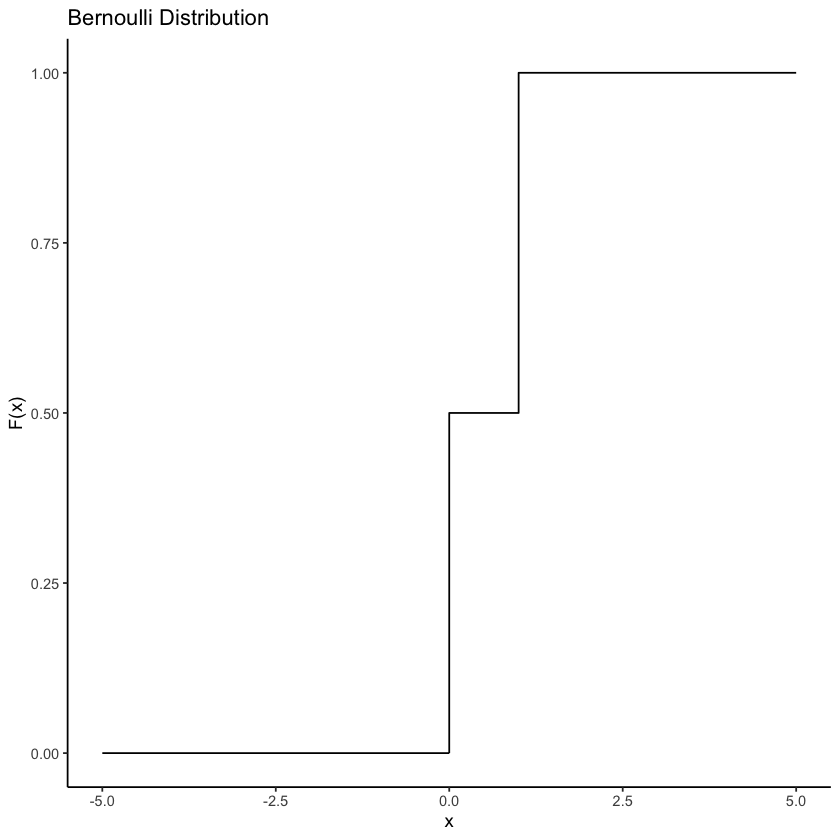

In [4]:
#Функция распределения Бернулли
ggplot(data.frame(x = c(-5, 5)), aes(x)) + 
    stat_function(fun = pbinom, args = list(size = 1, prob = 0.5), geom = 'step') +
    ylab("F(x)") +
    ggtitle("Bernoulli Distribution") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme_classic()

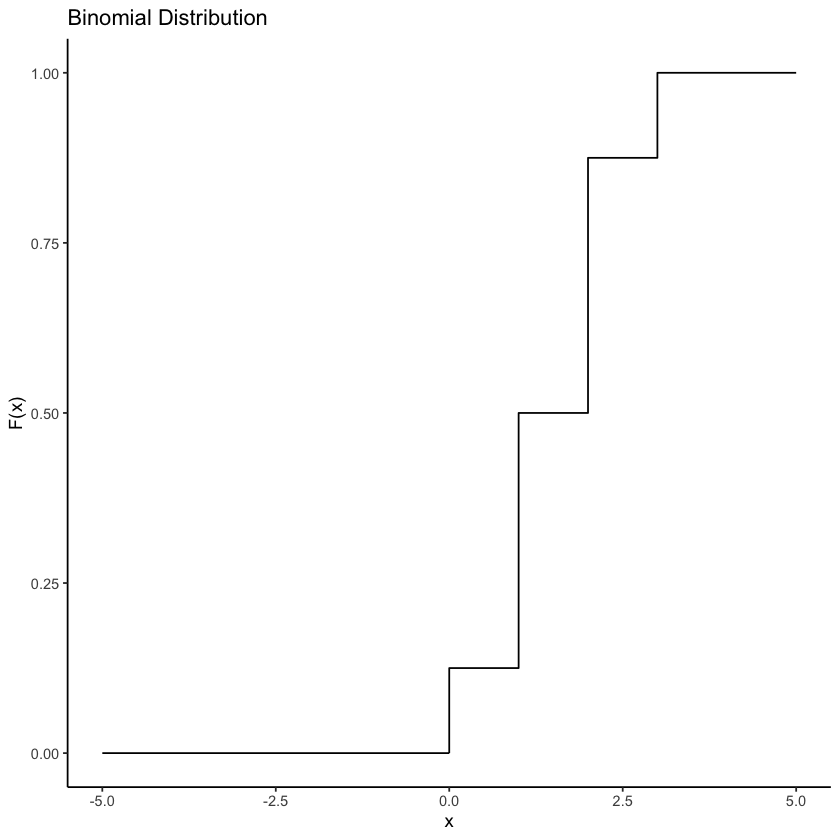

In [5]:
#Функция биномиального распределения
ggplot(data.frame(x = c(-5, 5)), aes(x)) + 
    stat_function(fun = pbinom, args = list(size = 3, prob = 0.5), geom = 'step') + 
    ylab("F(x)") +
    ggtitle("Binomial Distribution") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme_classic()

<br> 2. Распределение Хи-квадрат с 3 степенями свободы

Медиана

In [6]:
med <- qchisq(0.5, 3)
med

[1] 2.365974

Мода

In [7]:
f_1 <- function(x) {
  dchisq(x, 3)
}
mode <- optimize(f_1, c(0, 100), maximum = TRUE)
mode

$maximum
[1] 1.000002

$objective
[1] 0.2419707

Математическое ожидание $\mathbb{E}(X)$

In [8]:
f_2 <- function(x) {
  x*dchisq(x, 3)
}
mu <- integrate(f_2, -Inf, Inf)
mu

3 with absolute error < 3.5e-05

<br> 3. Распределение Стьюдента с 3 степенями свободы

Математическое ожидание $\mathbb{E}(X)$

In [9]:
f_1 <- function(x) {
  x * dt(x, 3)
}
mu <- integrate(f_1, -Inf, Inf)
mu

0 with absolute error < 0

Математическое ожидание $\mathbb{E}(X^2)$

In [10]:
f_2 <- function(x) {
  x^2 * dt(x, 3)
}
mu_2 <- integrate(f_2, -Inf, Inf, subdivisions = 2000)
mu_2

3 with absolute error < 3.4e-07

Дисперсия

In [11]:
mu_2$value - mu$value^2

[1] 3

## Выборочные характеристики

<br> 1. Эмпирическая функция распределения

In [12]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


In [13]:
# число наблюдений
n <- nrow(faithful)
n

[1] 272

In [14]:
# вариационный ряд значений времени ожидания
x_ecdf <- sort(faithful$waiting, decreasing = FALSE)
head(x_ecdf)
tail(x_ecdf)

[1] 43 45 45 45 46 46

[1] 91 92 93 93 94 96

In [15]:
# сгенерируем значения выборочной функции распределения
y_ecdf <- seq(from = 1, to = n, by=1)/n
head(y_ecdf)
tail(y_ecdf)

[1] 0.003676471 0.007352941 0.011029412 0.014705882 0.018382353 0.022058824

[1] 0.9816176 0.9852941 0.9889706 0.9926471 0.9963235 1.0000000

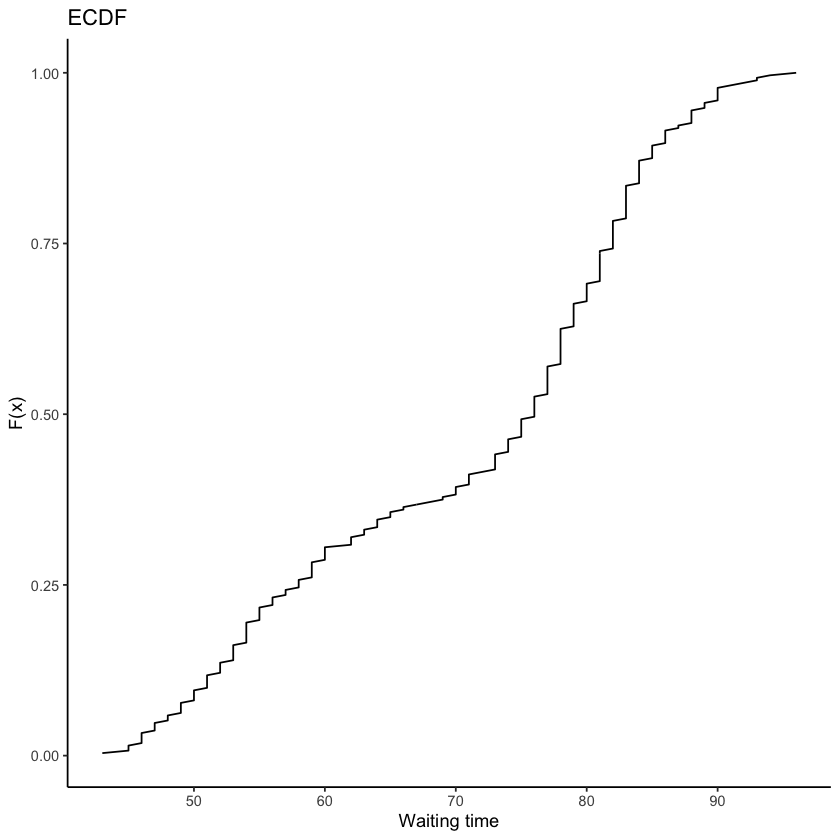

In [16]:
ggplot(mapping = aes(x = x_ecdf, y= y_ecdf)) + 
    geom_line() + 
    labs(title = 'ECDF', x = 'Waiting time', y = 'F(x)') + 
    theme(plot.title = element_text(hjust = 0.5)) +
    theme_classic()

<br> 2. 

Несмещенная выборочная дисперсия продолжительности извержения гейзера по формуле.

In [17]:
var_eval <- sum((faithful$eruptions - mean(faithful$eruptions))^ 2) / (nrow(faithful) - 1)
var_eval

[1] 1.302728

Несмещенная выборочная дисперсия продолжительности извержения гейзера с помощью функции.

In [18]:
var_erupt <-var(faithful$eruptions)
var_erupt

[1] 1.302728

Ковариацинная матрица признаков

In [19]:
cov_matrix <- cov(faithful)
cov_matrix

,eruptions,waiting
eruptions,1.302728,13.97781
waiting,13.977808,184.82331


Ковариация между двумя признаками

In [20]:
cov_matrix[2, 1]

[1] 13.97781

Корреляция времени ожидания и числа извержений

In [21]:
cor(faithful$eruptions, faithful$waiting)

[1] 0.9008112

<br> 3. Вычисление квантилей

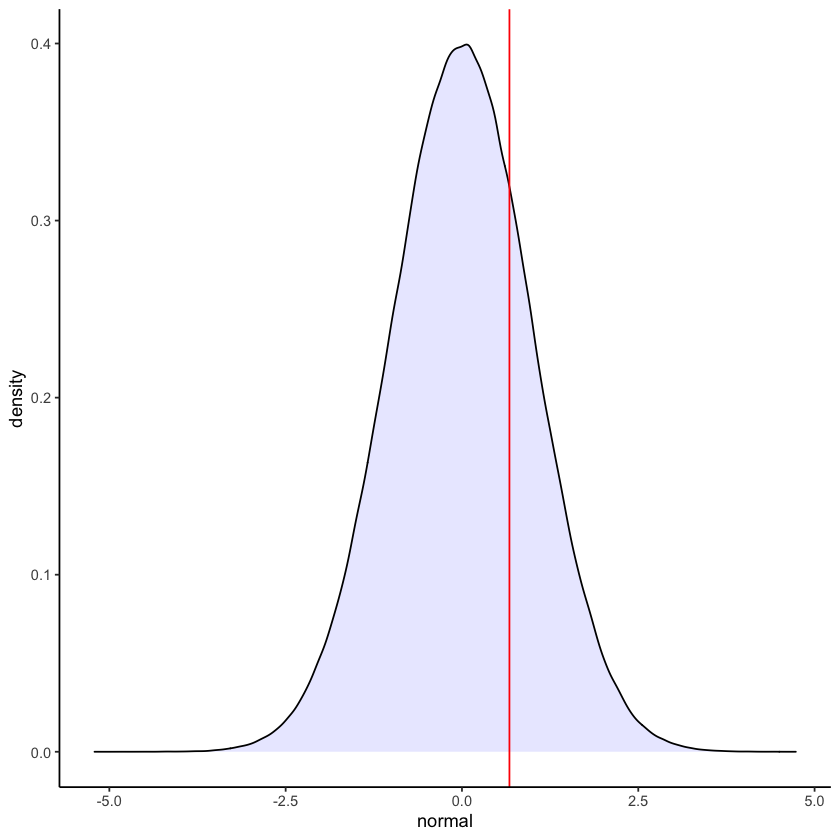

In [22]:
# Cгенерируем миллион наблюдений из стандартного нормального распределения.
normal <- rnorm(10^6, 0, 1)

#Посчитаем третий квартиль (0.75-квантиль) для данного распределения.
quartile <- quantile(normal, 0.75)

# Изобразим функцию плотности данного распределения и третий квартиль (0.75-квантиль).
ggplot() + 
    geom_density(aes(normal), fill = "blue", alpha = 0.1) +
    geom_vline(xintercept = quartile, col = "red", size = 0.5) +
    theme_classic()

<br> 4. Доверительный интервал для математического ожидания c 95% уровнем доверия

In [23]:
# Cреднее время ожидания извержения гейзера
mu_hat <- mean(faithful$waiting)

# Критическое значение статистики
z_critic <- qnorm(0.975)

# Границы доверительного интервала
low <- mu_hat - z_critic * sd(faithful$waiting) / sqrt(nrow(faithful))
high <- mu_hat + z_critic * sd(faithful$waiting)/ sqrt(nrow(faithful))

In [24]:
cat("Нижняя граница 95% ДИ:", low, "\n")
cat("Верхняя граница 95% ДИ:", high)

Нижняя граница 95% ДИ: 69.28143 
Верхняя граница 95% ДИ: 72.51269

<br> 5. Доверительный интервал для дисперсии с 90% уровнем доверия

In [25]:
# Посчитаем число степеней свободы
df <- length(faithful$eruptions)

# Границы доверительного интервала
crit_low <- qchisq(0.95, df - 1)
crit_high <- qchisq(0.05, df - 1)

high <- (df - 1) * var(faithful$eruptions) / crit_low
low  <- (df - 1) * var(faithful$eruptions) / crit_high

In [26]:
cat("Нижняя граница 90% ДИ:", low, "\n")
cat("Верхняя граница 90% ДИ:", high)

Нижняя граница 90% ДИ: 1.509511 
Верхняя граница 90% ДИ: 1.137382

## Анализ набора данных

In [27]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [28]:
candy <- read.csv("https://assets.datacamp.com/production/repositories/2971/datasets/bdbcfeff5aff20449bad8a8f1e66ae0169b9a26d/Candy.csv", header=TRUE, stringsAsFactors=FALSE)

In [29]:
describe(candy)

Warning message in describe(candy):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
competitorname*,1,85,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
chocolate,2,85,0.43529412,0.4987379,0.00000,0.42028986,0.000000,0.00000,1.00000,1.00000,0.25642582,-1.9568540,0.05409572
fruity,3,85,0.44705882,0.5001400,0.00000,0.43478261,0.000000,0.00000,1.00000,1.00000,0.20921476,-1.9790991,0.05424780
caramel,4,85,0.16470588,0.3731162,0.00000,0.08695652,0.000000,0.00000,1.00000,1.00000,1.77611959,1.1687646,0.04047013
peanutyalmondy,5,85,0.16470588,0.3731162,0.00000,0.08695652,0.000000,0.00000,1.00000,1.00000,1.77611959,1.1687646,0.04047013
nougat,6,85,0.08235294,0.2765332,0.00000,0.00000000,0.000000,0.00000,1.00000,1.00000,2.98505658,6.9932499,0.02999423
crispedricewafer,7,85,0.08235294,0.2765332,0.00000,0.00000000,0.000000,0.00000,1.00000,1.00000,2.98505658,6.9932499,0.02999423
hard,8,85,0.17647059,0.3834825,0.00000,0.10144928,0.000000,0.00000,1.00000,1.00000,1.66747212,0.7901730,0.04159452
bar,9,85,0.24705882,0.4338609,0.00000,0.18840580,0.000000,0.00000,1.00000,1.00000,1.15228355,-0.6798270,0.04705882


In [30]:
head(candy, 10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
2,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294
3,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109
4,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650
5,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146
6,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755
7,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.91455
8,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.41782
9,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.01096


In [31]:
#Средняя оценка карамельности
mean_caramel <- mean(candy$caramel)
mean_caramel

#Стандартное отклонение оценки шоколадности
sd_chocolate <- sd(candy$chocolate)
sd_chocolate

#Медиана стоимости конфет
median_price <- median(candy$pricepercent)
median_price

[1] 0.1647059

[1] 0.4987379

[1] 0.465

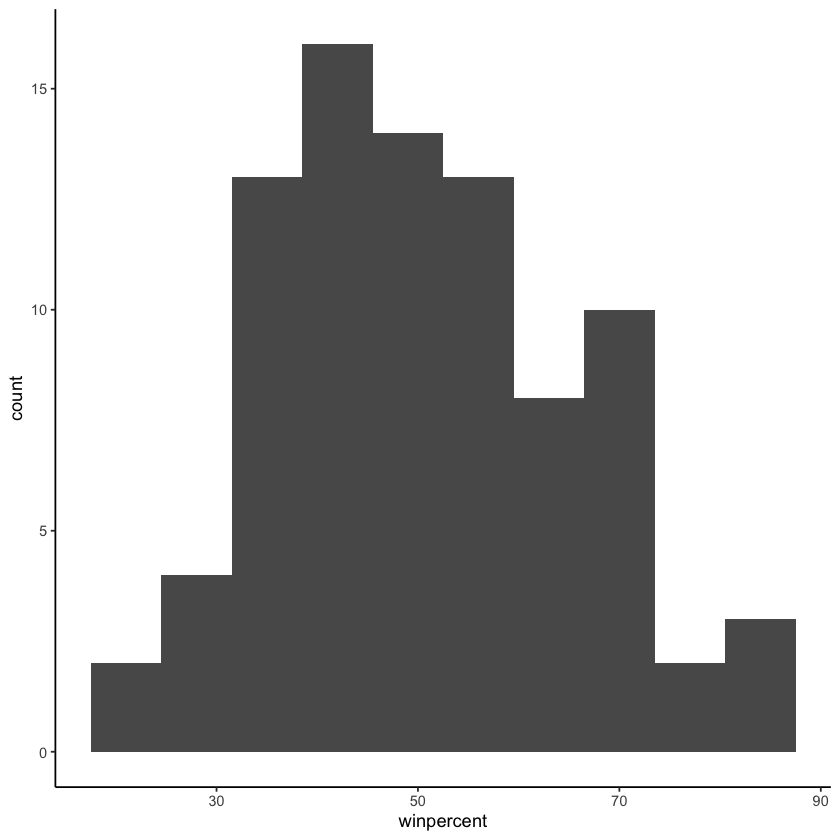

In [32]:
ggplot(data = candy, aes(x = winpercent)) +
    geom_histogram(binwidth = 7) + 
    theme_classic()

[1] 50.31676

[1] 47.82975

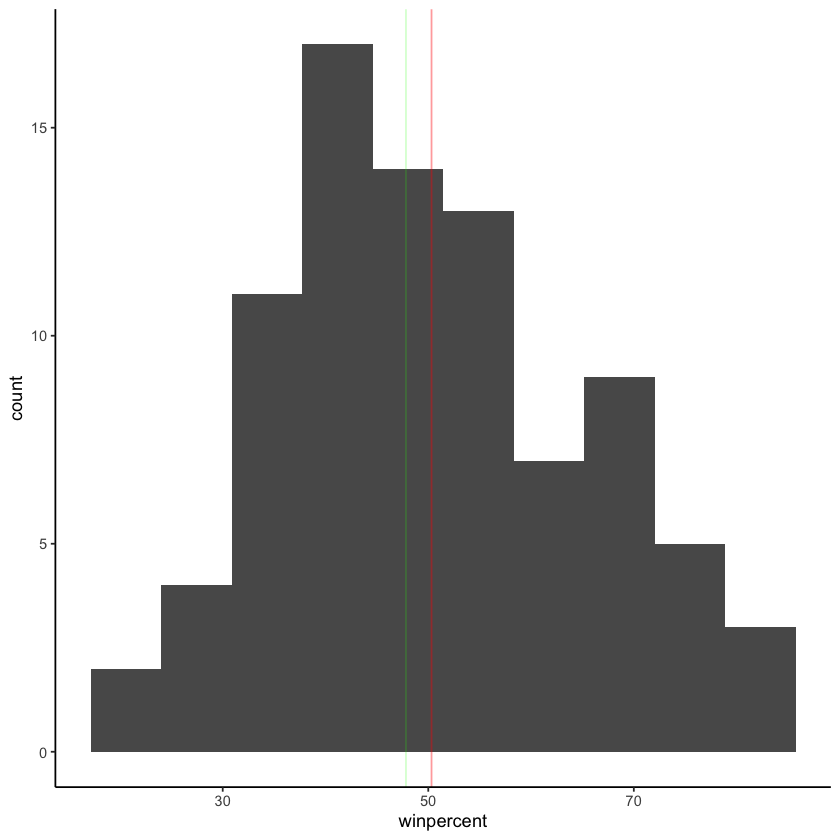

In [33]:
# Среднее значение пользовательских оценок
mean_win <- mean(candy$winpercent)
mean_win

# Медиана пользовательских оценок
median_win <- median(candy$winpercent)
median_win

# Гистограмма с отображёнными значениями среднего и медианы
ggplot(data = candy, aes(x = winpercent)) + 
    geom_histogram(bins = 10) + 
    geom_vline(xintercept = mean_win, col = "red", alpha = 0.4) + 
    geom_vline(xintercept = median_win, col = "green", alpha = 0.2) +
    theme_classic()

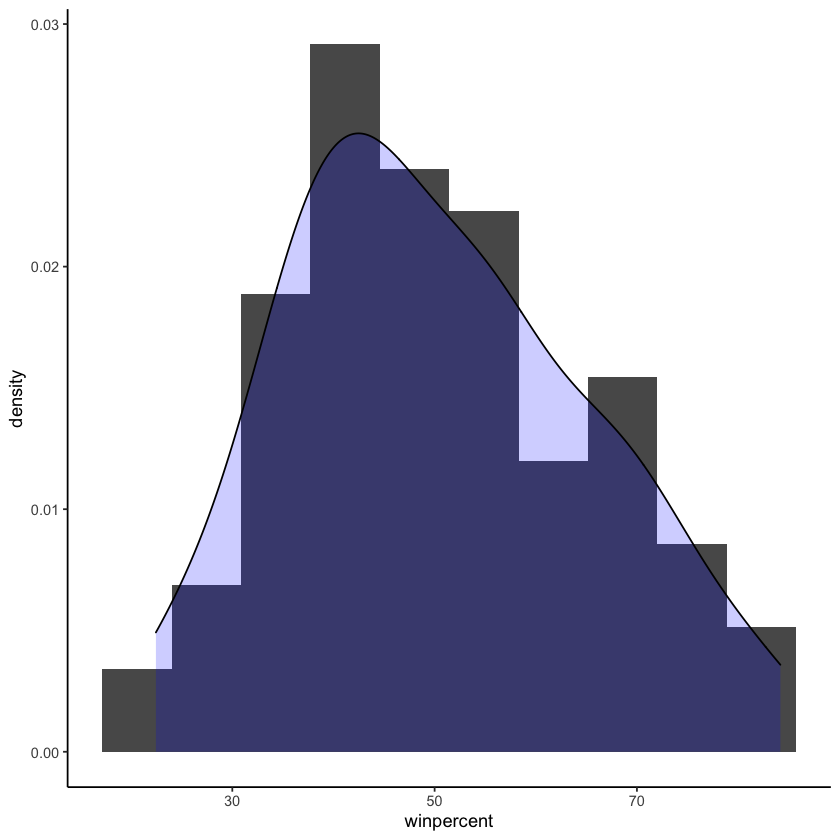

In [35]:
# Наложение графика плотности на гистограмму
ggplot(data = candy, aes(x = winpercent)) +
  geom_histogram(aes(y=..density..), bins = 10) +
  geom_density(fill = 'blue', alpha = 0.2) +
  theme_classic()

При анализе датасета бывает полезно посмотреть, какие переменные зависят друг от друга, потому что это может объяснить некоторые не очевидные следствия. Для этого Вам может понадобиться библиотека corrplot для удобной и наглядной работы с корреляционными матрицами. Так как корреляция может существовать только для числовых значений, то перед работой с датасетом из него необходимо убрать все нечисловые и, возможно, категориальные переменные. Чтобы убрать из датасета df столбец под названием col можно подключить библиотеку dplyr и написать df <- select(df, -col). К полученному датасету можно применять функцию cor, которая построит корреляционную матрицу.

In [39]:
library(corrplot)
library(dplyr)

corrplot 0.84 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [40]:
candy_cut <- select(candy, -competitorname)
candy_cor <- cor(candy_cut)
candy_cor

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.0000000,-0.74172106,0.24987535,0.37782357,0.25489183,0.34120978,-0.34417691,0.59742114,-0.33967519,0.10416906,0.5046754,0.6365167
fruity,-0.7417211,1.00000000,-0.33548538,-0.39928014,-0.26936712,-0.26936712,0.39067750,-0.51506558,0.29972522,-0.03439296,-0.4309685,-0.3809381
caramel,0.2498753,-0.33548538,1.00000000,0.05935614,0.32849280,0.21311310,-0.12235513,0.33396002,-0.26958501,0.22193335,0.2543271,0.2134163
peanutyalmondy,0.3778236,-0.39928014,0.05935614,1.00000000,0.21311310,-0.01764631,-0.20555661,0.26041960,-0.20610932,0.08788927,0.3091532,0.4061922
nougat,0.2548918,-0.26936712,0.32849280,0.21311310,1.00000000,-0.08974359,-0.13867505,0.52297636,-0.31033884,0.12308135,0.1531964,0.1993753
crispedricewafer,0.3412098,-0.26936712,0.21311310,-0.01764631,-0.08974359,1.00000000,-0.13867505,0.42375093,-0.22469338,0.06994969,0.3282654,0.3246797
hard,-0.3441769,0.39067750,-0.12235513,-0.20555661,-0.13867505,-0.13867505,1.00000000,-0.26516504,0.01453172,0.09180975,-0.2443653,-0.3103816
bar,0.5974211,-0.51506558,0.33396002,0.26041960,0.52297636,0.42375093,-0.26516504,1.00000000,-0.59340892,0.09998516,0.5184065,0.4299293
pluribus,-0.3396752,0.29972522,-0.26958501,-0.20610932,-0.31033884,-0.22469338,0.01453172,-0.59340892,1.00000000,0.04552282,-0.2207936,-0.2474479
sugarpercent,0.1041691,-0.03439296,0.22193335,0.08788927,0.12308135,0.06994969,0.09180975,0.09998516,0.04552282,1.00000000,0.3297064,0.2291507


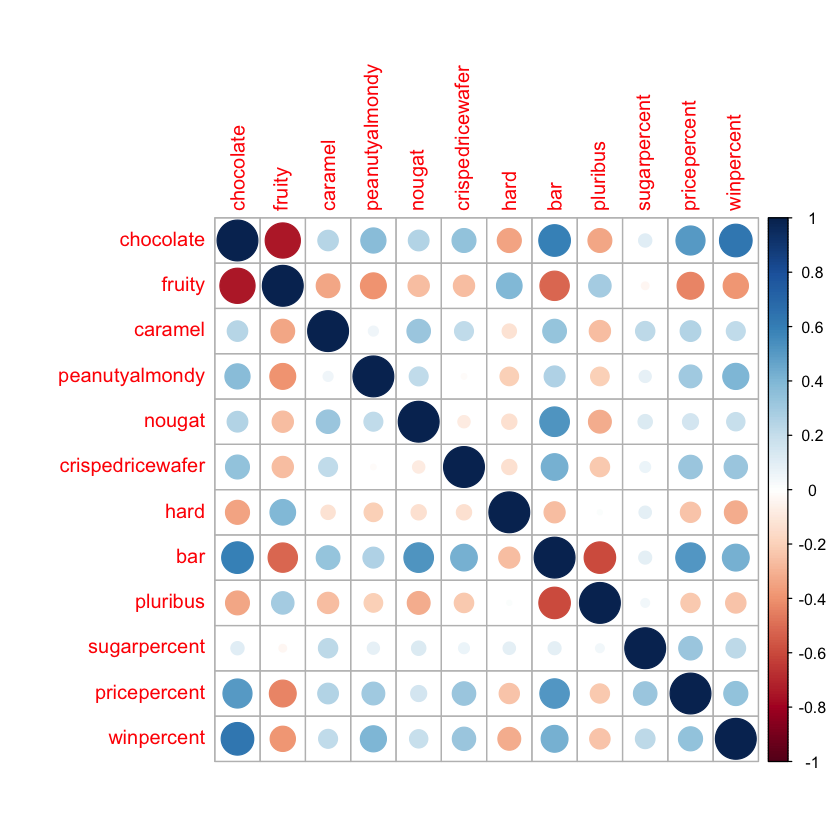

In [41]:
corrplot(candy_cor, method = 'circle')

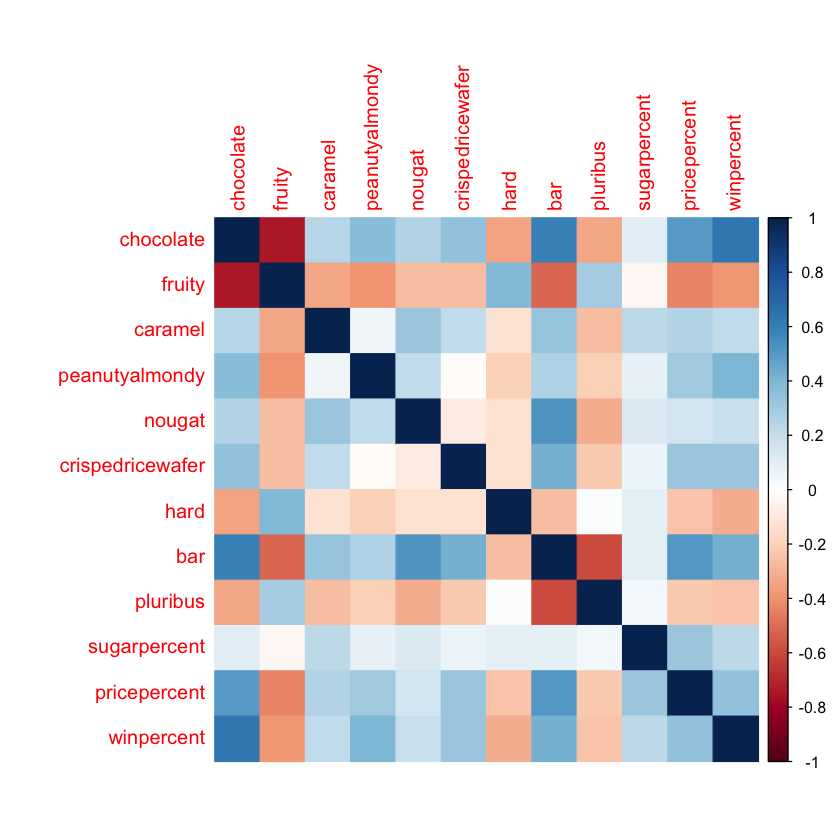

In [43]:
corrplot(candy_cor, method = "color")

In [45]:
# Среднее пользовательских оценок
mean_win <- mean(candy$winpercent)

# Стандартное отклонение пользовательских оценок
sd_win <- sd(candy$winpercent)

# Статистика для 95% доверительного интервала
z <- qnorm(0.975, mean = 0, sd = 1)

# Нижнее и верхнее значение доверительного интервала математического ожидания 
lower <- mean_win - z * sd_win/sqrt(nrow(candy))
upper <- mean_win + z * sd_win/sqrt(nrow(candy))

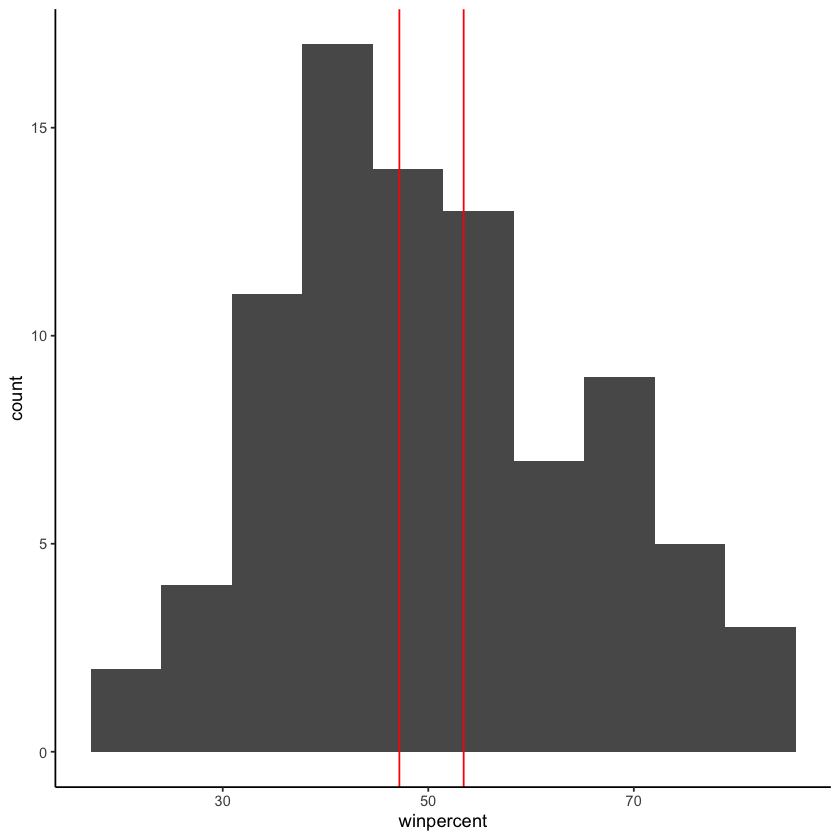

In [46]:
# Доверительный интервал
ggplot(candy, aes(x = winpercent)) +
    geom_histogram(bins = 10) +
    geom_vline(xintercept = lower, col = "red") +
    geom_vline(xintercept = upper, col = "red") +
    theme_classic()

In [ ]:
# Построение доверительных интервалов для дисперсии
